# Task 2

---

## Predictive modeling of customer bookings

### Importing Libraries


In [31]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### Importing the Dataset

In [32]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


### Checking Null Values 

In [33]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

### Mapping Categorical Features

In [35]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [36]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [37]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [38]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

mapping1 = {
    "Internet": 1,
    "Mobile": 2,
}

mapping2 = {
    "RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay": 3,
}

df["flight_day"] = df["flight_day"].map(mapping)
df["sales_channel"] = df["sales_channel"].map(mapping1)
df["trip_type"] = df["trip_type"].map(mapping2)

In [39]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [40]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [41]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,1.112360,1.017800,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,1.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,1.000000,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,1.000000,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,1.000000,1.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,2.000000,3.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [42]:
df.drop(['route','booking_origin'],axis=1,inplace=True)

### Balancing Classes

In [43]:
df.booking_complete.value_counts().unique()

array([42522,  7478])

In [44]:
X = df.drop(['booking_complete',],axis=1).to_numpy()
y = df['booking_complete'].to_numpy()

In [45]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smoted,y_smoted = oversample.fit_resample(X, y)

### Test_Train Split

In [46]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted, test_size = 0.2, random_state = 1) 

### Standardizing

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale = scaler.fit_transform(X_smoted) 

### Training the Random Forest CLassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

In [49]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_pred = clf.predict(X_test)

### Performance Metrics

In [51]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 90.428596625316


In [52]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8505
           1       0.97      0.84      0.90      8504

    accuracy                           0.90     17009
   macro avg       0.91      0.90      0.90     17009
weighted avg       0.91      0.90      0.90     17009



### Importance/Significance of Features

In [53]:
values = clf.feature_importances_.tolist()

In [54]:
values

[0.07814546825654327,
 0.040261061150657834,
 0.0011965404465154117,
 0.12154933935252454,
 0.11295978865026736,
 0.08833667855500625,
 0.07357269257057834,
 0.11501381937644657,
 0.11470094243919038,
 0.10947659969115044,
 0.14478706951111966]

In [55]:
labels = df.columns.drop(['booking_complete'])
labels

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration'],
      dtype='object')

Text(0.5, 1.0, 'Significance of Each Feature on Bookings')

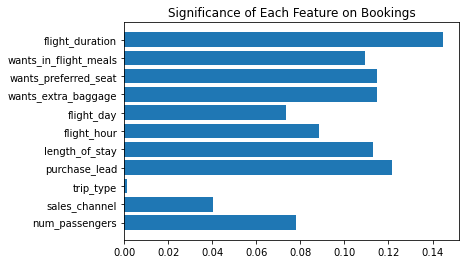

In [56]:
plt.barh(labels,clf.feature_importances_)
plt.title('Significance of Each Feature on Bookings')